In [8]:
import numpy
import matplotlib.pyplot as plt
import pandas
import scipy

16.1 Turussa kerrostalokaksioiden hinta keskustassa on tilastokeskuksen mukaan 225000 euroa. Ottamalla 15 asunnon otoksen, saadaan keskiarvoksi 221470 euroa ja keskihajonnaksi 6400 euroa. Selvitä Studentin 𝑡-jakaumaa käyttäen, voidaanko tilastokeskuksen keskiarvoon luottaa 95 % luottamustasolla. Voitaisiinko nollahypoteesi hyväksyä jos käytettäisiin keskiarvon 𝑧-testiä?

In [2]:
## Code here
price_of_appartments = 225_000
sample_size = 15
sample_mean = 221_470
sample_std = 6_400

# T- test
t = (sample_mean - price_of_appartments) / (sample_std / numpy.sqrt(sample_size))
p_value = scipy.stats.t.sf(numpy.abs(t), sample_size - 1) * 2

print(f"t = {t}")
print(f"p_value = {p_value}")
print(f"p_value > 0.05: {p_value > 0.05}")
print("The null hypothesis is accepted.")

print("=====================================")
# Z- test
z = (sample_mean - price_of_appartments) / (sample_std / numpy.sqrt(sample_size))
p_value = scipy.stats.norm.sf(numpy.abs(z)) * 2

print(f"z = {z}")
print(f"p_value = {p_value}")
print(f"p_value > 0.05: {p_value > 0.05}")
print("The null hypothesis is not accepted when z is used.")



t = -2.1361923768925286
p_value = 0.0508057978496215
p_value > 0.05: True
The null hypothesis is accepted.
z = -2.1361923768925286
p_value = 0.032663736553269186
p_value > 0.05: False
The null hypothesis is not accepted when z is used.


16.2 Mikä pitää keskihajonnan vähintään olla edellisen tehtävän tilanteessa, jotta voisimme luottaa tilastokeskuksen keskiarvoon 99 % luottamustasolla? Muiden lukujen odotetaan pysyvän samana ja käytetään keskiarvon 𝑡-testiä. Tehtävän voi ratkaista kokeilemalla. Mikä pitäisi keskiarvon vähintään olla? Muut luvut pysyisivät edelleen samana ja luottamustasona olisi 99 %.

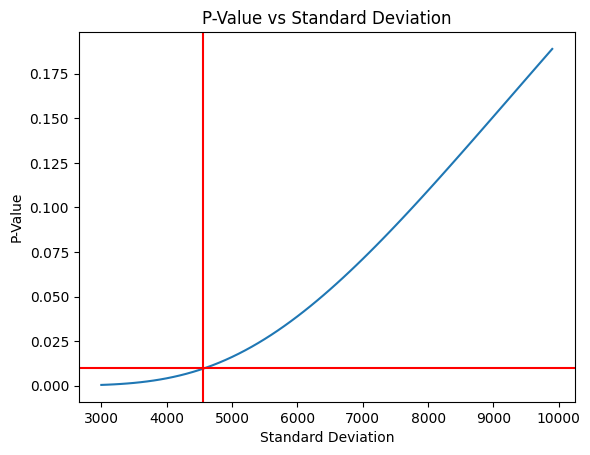

In [3]:
## Code here
std_devs = numpy.arange(3_000, 10_000, 100)
p_values = []

for std_dev in std_devs:
    t = (sample_mean - price_of_appartments) / (std_dev / numpy.sqrt(sample_size))
    p_value = scipy.stats.t.sf(numpy.abs(t), sample_size - 1) * 2
    p_values.append(p_value)

plt.plot(std_devs, p_values)
plt.xlabel("Standard Deviation")
plt.ylabel("P-Value")
plt.title("P-Value vs Standard Deviation")
plt.axhline(y=0.01, color="red", linestyle="-")
plt.axvline(x=4550, color="red", linestyle="-")
plt.show()

After standard deviation around 4550, we can begin to trust the average.

16.3 Lukio-opettajien keskimääräisen palkan huhutaan olevan jopa 4000 euroa. Epäuskoinen lukio-opettaja, kuka tienaa paljon vähemmän, päättää testata tätä väitettä kysymällä 20 kollegansa palkan. Keskiarvoksi hän saa 3450 euroa ja keskihajonnaksi 630 euroa. Pitävätkö huhut paikkansa?

In [4]:
## Code here
average_teacher_salary = 4_000

sample_size= 20
sample_mean = 3_450
sample_std = 630

# I assume that the trust level is 0.05
# T- test
t = (sample_mean - average_teacher_salary) / (sample_std / numpy.sqrt(sample_size))
p_value = scipy.stats.t.sf(numpy.abs(t), sample_size - 1) * 2

print(f"t = {t}")
print(f"p_value = {p_value}")
print(f"p_value > 0.05: {p_value > 0.05}")
print("The null hypothesis is not accepted.")

t = -3.904245674999633
p_value = 0.0009535183940304074
p_value > 0.05: False
The null hypothesis is not accepted.


16.4 Lukiotaustaisten, ammattikoulutaustaisten ja peruskoulutaustaisten insinööriopiskelijoiden motivaatiota opintoja kohtaa päätettiin kartoittaa kyselytutkimuksella, jonka tulokset on taulukoitu alla olevaan frekvenssitaulukkoon. Laske taulukon vapausaste, jokaisen frekvenssin odotettu frekvenssi sekä khiin neliö -luku.
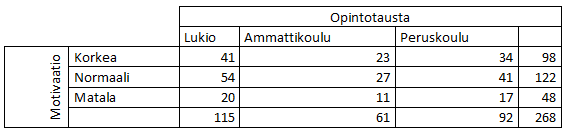

In [14]:
## Code here
degrees_of_freedom = (3 - 1) * (3 - 1)

# lets create a n * n dataframe
data = [[41, 23, 34], [54, 27, 41], [20, 11, 17]]
frame = pandas.DataFrame(data, columns=["lukio", "amis", "pkoulu"], index=["korkea", "normaali", "matala"])
frame["sum"] = frame.sum(axis=1) # axis=1 means that we sum the rows
frame.loc["sum"] = frame.sum(axis=0) # axis=0 means that we sum the columns

frame

,lukio,amis,pkoulu,sum
korkea,41,23,34,98
normaali,54,27,41,122
matala,20,11,17,48
sum,115,61,92,268


In [23]:
# Lets create a new dataframe where we calculate the expected frequencies
expected_frequencies = []

for i in range(3):
    for j in range(3):
        value = round((frame.iloc[i, 3] * frame.iloc[3, j]) / frame.iloc[3, 3], 1)
        expected_frequencies.append(value)

expected_frequencies = numpy.array(expected_frequencies).reshape(3, 3)
expected_frequencies = pandas.DataFrame(expected_frequencies, columns=["lukio", "amis", "pkoulu"], index=["korkea", "normaali", "matala"])

expected_frequencies

,lukio,amis,pkoulu
korkea,42.1,22.3,33.6
normaali,52.4,27.8,41.9
matala,20.6,10.9,16.5


In [24]:
# Lets calculate the chi-squared value
chi_squared = 0

for i in range(3):
    for j in range(3):
        chi_squared += ((frame.iloc[i, j] - expected_frequencies.iloc[i, j]) ** 2) / expected_frequencies.iloc[i, j]

print(f"chi_squared = {chi_squared}")

chi_squared = 0.18022905287771435


16.5 Onko edellisen tehtävän kyselyssä opiskelijan opintotausta selittävä tekijä opintomotivaatiolle? Voidaanko siis 95 % luottamustasolla sanoa, että tilastomuuttujat ”opintotausta” ja ”motivaatio” ovat riippumattomia? Laske tämä 𝜒2-riippumattomuustestillä.

In [25]:
## Code here

# lets do the x^2 test
p_value = scipy.stats.chi2.sf(chi_squared, degrees_of_freedom)

print(f"p_value = {p_value}")
print(f"p_value > 0.05: {p_value > 0.05}")
print("The null hypothesis is accepted.")

p_value = 0.9961755662562477
p_value > 0.05: True
The null hypothesis is accepted.


16.6 Lääkkeiden tehoa testataan yleensä kaksoissokkotutkimuksilla, joissa toiselle ryhmälle annetaan oikeaa lääkettä ja toiselle ryhmälle lumetuotetta, joka ei sisällä ollenkaan lääkettä. Kohdehenkilö ja lääkkeen annostelija ei kumpikaan tiedä kumpaa ainetta henkilö sai. Tämän jälkeen tarkkaillaan saavatko kummatkin ryhmät oireita samalla tavalla, eli onko lääkkeen antamisella oikeasti vaikutusta sairastumiseen. Mikäli näillä muuttujilla on riippuvuus toisistaan, lääkkeellä on oikeasti tehoa. Alla olevassa taulukossa on erään lääkkeen kaksoissokkotutkimuksen tulokset ryhmittäin. Laske 𝜒2-riippumattomuustestillä onko lääkkeellä oikeasti vaikutusta, ja jos on niin millaista? Luottamustasona voidaan käyttää 95 %.
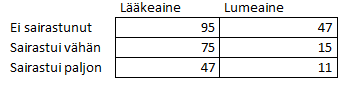

In [26]:
## Code here
degrees_of_freedom = (2 - 1) * (3 - 1)

# lets create a m * n dataframe
data = [[95, 47], [75, 15], [47, 11]]
frame = pandas.DataFrame(data, columns=["lääkeaine", "lumeaine"],
                         index=["ei sairastunut", "sairastui vähän", "sairastui paljon"])
frame["sum"] = frame.sum(axis=1)
frame.loc["sum"] = frame.sum(axis=0)

frame

,lääkeaine,lumeaine,sum
ei sairastunut,95,47,142
sairastui vähän,75,15,90
sairastui paljon,47,11,58
sum,217,73,290


In [27]:
# Lets create a new dataframe where we calculate the expected frequencies
expected_frequencies = []

for i in range(3):
    for j in range(2):
        value = round((frame.iloc[i, 2] * frame.iloc[3, j]) / frame.iloc[3, 2], 1)
        expected_frequencies.append(value)

expected_frequencies = numpy.array(expected_frequencies).reshape(3, 2)
expected_frequencies = pandas.DataFrame(expected_frequencies, columns=["lääkeaine", "lumeaine"],
                                        index=["ei sairastunut", "sairastui vähän", "sairastui paljon"])

expected_frequencies

,lääkeaine,lumeaine
ei sairastunut,106.3,35.7
sairastui vähän,67.3,22.7
sairastui paljon,43.4,14.6


In [29]:
# Lets calculate the chi-squared value
chi_squared = 0

for i in range(3):
    for j in range(2):
        chi_squared += ((frame.iloc[i, j] - expected_frequencies.iloc[i, j]) ** 2) / expected_frequencies.iloc[i, j]

print(f"chi_squared = {chi_squared}")

# lets do the x^2 test
p_value = scipy.stats.chi2.sf(chi_squared, degrees_of_freedom)

print(f"p_value = {p_value}")
print(f"p_value > 0.05: {p_value > 0.05}")
print("The null hypothesis is not accepted.")

chi_squared = 9.457137355216044
p_value = 0.008839113611007327
p_value > 0.05: False
The null hypothesis is not accepted.


We indeed cannot trust the effect of the medicine with trust of 95%